In [1]:
# import cv2
# import numpy as np
# # from ultralytics import YOLO

# cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")
# timestamps = [cap.get(cv2.CAP_PROP_POS_MSEC)]

# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# filter_out = cv2.VideoWriter(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_filter.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, (width, height))

# prev_frame_grey = None
# wakeup_time_left = 0

# while cap.isOpened():
#     ret, frame =  cap.read()
#     if not ret:
#         break
    
   
#     frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
#     if prev_frame_grey is None:
#         prev_frame_grey = frame_grey   
    
#     frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
    
#     _, filter_frame = cv2.threshold(frame_difference, 30, 255, cv2.THRESH_BINARY)
    
#     cv2.imshow("Filtered", filter_frame)
        
#     pixels_changed = np.sum(filter_frame)/255

#     # print(timestamps)
    
#     if pixels_changed > 5000:
#         filter_out.write(filter_frame)
#         timestamps.append(cap.get(cv2.CAP_PROP_POS_MSEC))
    
#     prev_frame_grey = frame_grey
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# filter_frame.release()

# Filter Analysis

In [ ]:
import cv2
import numpy as np
# from ultralytics import YOLO

raw_cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_raw.mp4")
filter_cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_filter_raw.mp4")

timestamps = [raw_cap.get(cv2.CAP_PROP_POS_MSEC)]

width = int(raw_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(raw_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

prev_frame_grey = None
wakeup_time_left = 0

frame = 0
while raw_cap.isOpened():
    # print(frame)
    frame += 1
    ret, raw_frame =  raw_cap.read()
    _, filter_frame = filter_cap.read()
    
    if not ret:
        break
    
    filter_frame = cv2.cvtColor(filter_frame, cv2.COLOR_BGR2GRAY)
    pixels = (filter_frame>30).sum()
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Threshold Histogram

In [ ]:
import cv2
import numpy as np
# from ultralytics import YOLO

cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# filter_out = cv2.VideoWriter(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_filter.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, (width, height))
# filter_raw = cv2.VideoWriter(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_filter_raw.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, (width, height))
# raw_out = cv2.VideoWriter(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_raw.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, (width, height))

key_frames = [1, 17, 99, 258, 277, 331, 333, 361, 383, 444, 461, 538, 577, 595, 618, 647, 704, 726, 742, 768, 818, 844, 878, 892, 910, 1018, 1104, 1127, 1186, 1205, 1224, 1289, 1334, 1358, 1379, 1394, 1406, 1433, 1446, 1484, 
 1492, 1533, 1563, 1677, 1690, 1717, 1741, 1776, 1859, 2700, 2791, 2823, 2836, 2866, 2944, 2998, 3033, 3054, 3085, 3172, 3179, 3308, 3342, 3439, 3599, 3623, 3638, 3690, 3696, 3817, 3837, 3915, 3925, 3956, 3976, 
 4098, 4135, 4170, 4192, 4213, 4246, 4272, 4301, 4315, 4320, 4340, 4362, 4389, 4394, 4444, 4464, 4483, 4484]
END = 4626
key_frames_raw = []

prev_frame_grey = None
wakeup_time_left = 0

frame_num = 1
raw_frame_num = 0
is_correct = False
while cap.isOpened():
    ret, frame =  cap.read()
    if not ret:
        break
    
    frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
    if prev_frame_grey is None:
        prev_frame_grey = frame_grey   
    
    frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
    
    _, filter_frame = cv2.threshold(frame_difference, 30, 255, cv2.THRESH_BINARY)
    
    pixels_changed = np.sum(filter_frame)/255

    # print(timestamps)
    
    if pixels_changed > 5000:
        # filter_frame = cv2.cvtColor(filter_frame, cv2.COLOR_GRAY2BGR)
        # filter_raw.write(filter_frame)
        
        # cv2.putText(filter_frame, f"pixels: {int(pixels_changed)}", (0,25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 3)  
        # cv2.putText(filter_frame, f"{raw_frame_num}", (width-100,25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 3)
        # cv2.imshow("Filtered", filter_frame)
    
        # cv2.putText(frame, f"{frame_num}", (width-100,25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 3)
        
        if frame_num in key_frames:
            is_correct = not is_correct
            key_frames_raw.append(raw_frame_num)
        if frame_num == END:
            break
        frame_num += 1
    else:
        if is_correct:
            key_frames_raw.append(raw_frame_num)
            is_correct = not is_correct
        # raw_out.write(frame)
        # filter_out.write(filter_frame)
        # timestamps.append(cap.get(cv2.CAP_PROP_POS_MSEC))
    
    prev_frame_grey = frame_grey
    
    raw_frame_num += 1
    
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# with open("timestamps.txt", "w") as f:
#     print(len(timestamps))
#     f.write(str(timestamps))
    
cap.release()
# raw_out.release()
# filter_out.release()
# filter_raw.release()

In [ ]:
# # END = 81909
# # key_frames_raw = key_frames_raw - 1
# np.save(r"data\key_frames_raw_02_26.npy", key_frames_raw)
# # key_frames_raw

In [ ]:
import cv2
import numpy as np

num_of_pixels_changed = []
cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


prev_frame_grey = None
raw_frame_num = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if prev_frame_grey is None:
        prev_frame_grey = frame_grey  
    
    frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
    
    prev_frame_grey = frame_grey
    
    _, filter_frame = cv2.threshold(frame_difference, 30, 255, cv2.THRESH_BINARY)
    
    pixels_changed = np.sum(filter_frame)/255
    
    num_of_pixels_changed.append(pixels_changed)
    
    if raw_frame_num == key_frames_raw[-1]:
        break
            
    raw_frame_num += 1
    
cap.release()    
threshold_data.append(num_of_pixels_changed)

cap.release()

KeyboardInterrupt: 

In [228]:
import cv2
import numpy as np
from tqdm import tqdm
# from ultralytics import YOLO

pixel_value_thresholds = np.linspace(0, 100, 11)

threshold_data = []

for pixel_threshold in tqdm(pixel_value_thresholds):
    num_of_pixels_changed = []
    cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


    prev_frame_grey = None
    raw_frame_num = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        if prev_frame_grey is None:
            prev_frame_grey = frame_grey  
        
        frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
        
        prev_frame_grey = frame_grey
        
        _, filter_frame = cv2.threshold(frame_difference, pixel_threshold, 255, cv2.THRESH_BINARY)
        
        pixels_changed = np.sum(filter_frame)/255
        
        num_of_pixels_changed.append(pixels_changed)
        
        if raw_frame_num == key_frames_raw[-1]:
            break
                
        raw_frame_num += 1
        
    cap.release()    
    threshold_data.append(num_of_pixels_changed)
    
    cap.release()


100%|██████████| 11/11 [53:49<00:00, 293.62s/it]


In [ ]:
# np.save(r"data\threshold_data.npy", threshold_data)
# pixel_value_thresholds
threshold_data
# np.linspace(0, 250, 26)

[[np.float64(0.0),
  np.float64(510317.0),
  np.float64(443534.0),
  np.float64(334630.0),
  np.float64(267325.0),
  np.float64(200089.0),
  np.float64(212951.0),
  np.float64(145783.0),
  np.float64(144706.0),
  np.float64(177040.0),
  np.float64(143635.0),
  np.float64(113717.0),
  np.float64(621395.0),
  np.float64(223822.0),
  np.float64(186779.0),
  np.float64(142736.0),
  np.float64(142970.0),
  np.float64(133572.0),
  np.float64(123251.0),
  np.float64(111164.0),
  np.float64(107302.0),
  np.float64(112136.0),
  np.float64(112138.0),
  np.float64(100085.0),
  np.float64(599078.0),
  np.float64(229153.0),
  np.float64(196431.0),
  np.float64(156885.0),
  np.float64(158147.0),
  np.float64(136246.0),
  np.float64(117475.0),
  np.float64(106272.0),
  np.float64(110032.0),
  np.float64(101003.0),
  np.float64(103547.0),
  np.float64(115689.0),
  np.float64(602809.0),
  np.float64(236737.0),
  np.float64(205593.0),
  np.float64(175491.0),
  np.float64(153054.0),
  np.float64(144216.0

In [215]:
is_correct_key_frames = []
for i in range(0, 182, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))
is_correct_key_frames[-1]
    

np.int64(81952)

In [ ]:
pixel_count_thresholds = np.linspace(0, 10000, 101)
key_frames_raw = np.array(key_frames_raw)
precision_scores = np.zeros((11, 101))
recall_scores = np.zeros((11, 101))
f2_scores = np.zeros((11, 101))

for i, pt in enumerate(pixel_value_thresholds):
    cap_data = np.array(threshold_data[i])

    for j, pixel_count_thresh in enumerate(pixel_count_thresholds):
        print(f"Pixel threshold: {pt}, Pixel Count Threshold: {pixel_count_thresh}")
        cap_data_selected = cap_data > pixel_count_thresh
        TP = np.sum(cap_data_selected[is_correct_key_frames])
        FP = np.sum(cap_data_selected) - TP
        FN = np.sum((~cap_data_selected)[is_correct_key_frames])
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        
        print(f"Precision: {precision}, Recall: {recall}")
        
        F2 = (1+2**2)*(precision*recall)/((2**2)*precision+recall)
        
        precision_scores[i, j] = precision
        recall_scores[i, j] = recall
        f2_scores[i, j] = F2
        
        print(f"F2 Score: {F2}")

        
# f1_scores = np.zeros((10, ))

Pixel threshold: 0.0, Pixel Count Threshold: 0.0
Precision: 0.018791833196898925, Recall: 1.0
F1 Score: 0.08739027230383374
Pixel threshold: 0.0, Pixel Count Threshold: 100.0
Precision: 0.018791833196898925, Recall: 1.0
F1 Score: 0.08739027230383374
Pixel threshold: 0.0, Pixel Count Threshold: 200.0
Precision: 0.018791833196898925, Recall: 1.0
F1 Score: 0.08739027230383374
Pixel threshold: 0.0, Pixel Count Threshold: 300.0
Precision: 0.018791833196898925, Recall: 1.0
F1 Score: 0.08739027230383374
Pixel threshold: 0.0, Pixel Count Threshold: 400.0
Precision: 0.018791833196898925, Recall: 1.0
F1 Score: 0.08739027230383374
Pixel threshold: 0.0, Pixel Count Threshold: 500.0
Precision: 0.018791833196898925, Recall: 1.0
F1 Score: 0.08739027230383374
Pixel threshold: 0.0, Pixel Count Threshold: 600.0
Precision: 0.018791833196898925, Recall: 1.0
F1 Score: 0.08739027230383374
Pixel threshold: 0.0, Pixel Count Threshold: 700.0
Precision: 0.018791833196898925, Recall: 1.0
F1 Score: 0.087390272303

In [223]:
# f1_scores[np.isnan(f1_scores)] = 0
pixel_count_thresholds

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
        7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
        8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
        8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
        9600.,  9700.,  9800.,  9900., 10000.])

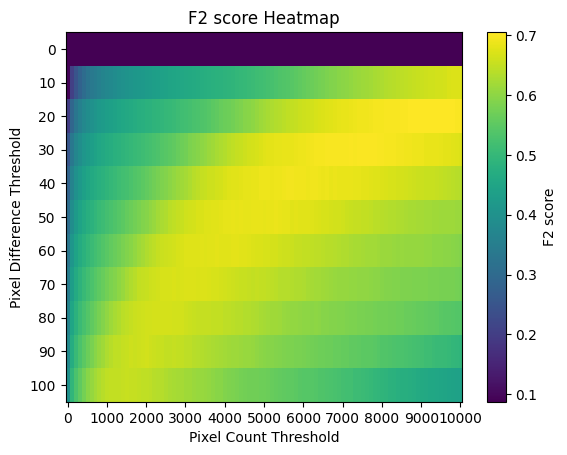

In [261]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
plt.imshow(f2_scores, interpolation='nearest', cmap='viridis', aspect="auto")
plt.title('F2 score Heatmap')
plt.xlabel('Pixel Count Threshold')
plt.ylabel('Pixel Difference Threshold')
plt.colorbar(label='F2 score')
plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
plt.yticks(ticks=np.arange(len(pixel_value_thresholds)), labels=np.array(pixel_value_thresholds, dtype=np.int64))
plt.show()

In [280]:
np.argmax(f2_scores)
f2_scores[2, 94]
pixel_count_thresholds[94]

np.float64(9400.0)

# Weighted Pixel Activations

In [8]:
import numpy as np
import cv2

key_frames_raw = np.load(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\key_frames_raw_02_26.npy")
is_correct_key_frames = []
for i in range(0, 182, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))

num_of_pixels_changed = []
cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

pixel_activation_count = np.zeros((height, width))

prev_frame_grey = None
raw_frame_num = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if prev_frame_grey is None:
        prev_frame_grey = frame_grey  
    
    frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
    
    prev_frame_grey = frame_grey
    
    if raw_frame_num in is_correct_key_frames:
        _, filter_frame = cv2.threshold(frame_difference, 20, 1, cv2.THRESH_BINARY)
        pixel_activation_count += filter_frame
        
    if raw_frame_num == key_frames_raw[-1]:
        break
            
    raw_frame_num += 1

cap.release()
    

In [ ]:
pixel_activation_count_normalised = pixel_activation_count/np.sum(pixel_activation_count)
# np.save(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\pixel_activation_map.npy", pixel_activation_count_normalised)

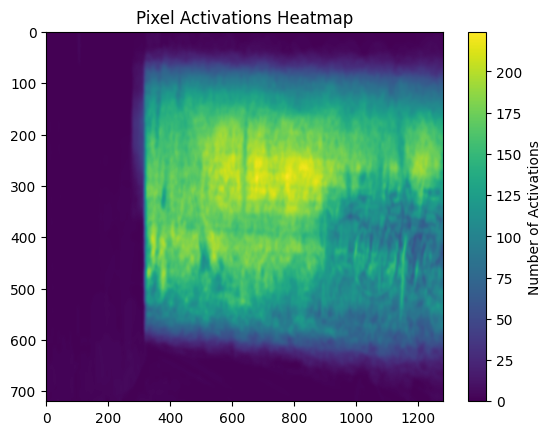

In [41]:
import matplotlib.pyplot as plt

plt.imshow(cv2.GaussianBlur(pixel_activation_count, (19,19), 0), cmap='viridis', aspect="auto")
# plt.imshow(pixel_activation_count, cmap='viridis', aspect="auto")
plt.title('Pixel Activations Heatmap')
# plt.xlabel('Pixel Count Threshold')
# plt.ylabel('Pixel Difference Threshold')
# plt.axis("off")
plt.colorbar(label='Number of Activations')
# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.yticks(ticks=np.arange(len(pixel_value_thresholds)), labels=np.array(pixel_value_thresholds, dtype=np.int64))
plt.show()

In [42]:
import numpy as np
import cv2

num_of_pixels_changed = []
cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

pixel_count_thresholds = np.linspace(0, 1, 101)
precision_scores = np.zeros(101)
recall_scores = np.zeros(101)
f2_score_scores = np.zeros(101)

for i, threshold in enumerate(pixel_count_thresholds):
    prev_frame_grey = None
    raw_frame_num = 0
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        if prev_frame_grey is None:
            prev_frame_grey = frame_grey  
        
        frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
        
        prev_frame_grey = frame_grey
        _, filter_frame = cv2.threshold(frame_difference, 20, 1, cv2.THRESH_BINARY)
        
        pixels_changed = np.sum(filter_frame*pixel_activation_count_normalised)
        if pixels_changed > threshold:
            if raw_frame_num in is_correct_key_frames:
                TP += 1
            else:
                FP += 1
        else:
            if raw_frame_num in is_correct_key_frames:
                FN += 1
            else:
                TN += 1

        if raw_frame_num == key_frames_raw[-1]:
            break
                
        raw_frame_num += 1

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
        
    F2 = (1+2**2)*(precision*recall)/((2**2)*precision+recall)
    
    print(f"Precision: {precision}, Recall: {recall}, F2: {F2}")
    
    
    precision_scores[i] = precision
    recall_scores[i] = recall
    f2_scores[i] = F2

cap.release()
    

Precision: 0.04782648710003988, Recall: 0.9987187700192185, F2: 0.20068999253366288


NameError: name 'f2_scores' is not defined

# Machine Learning Classifier

In [ ]:
import torch.nn as nn


# Wide Angle Lens eval

In [ ]:
import cv2
import numpy as np
import yaml
# from ultralytics import YOLO

with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\config\calibration.yaml", "r") as f:
    config = yaml.safe_load(f)
D = np.array(config["D"])
K = np.array(config["K"])

scaled_K = K
scaled_K[2][2] = 1.0

K2 = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(scaled_K, D, (1280, 720), np.eye(3), balance=1)
map1, map2 = cv2.fisheye.initUndistortRectifyMap(scaled_K, D, np.eye(3), K2, (1280, 720), cv2.CV_16SC2)

raw_cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-04-18_19-17-25.mp4")

width = int(raw_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(raw_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

key_frame_num = np.random.random_integers(0,100, None)

frame_num = 0
while raw_cap.isOpened():
    ret, raw_frame =  raw_cap.read()

    if not ret:
        break
    
    frame = cv2.remap(raw_frame, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    
    
    # cv2.imshow("frame", frame)
    
    if frame_num == key_frame_num:
        cv2.imwrite("Bike shed random frame.png", raw_frame)
        break
    else:
        frame_num += 1

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
raw_cap.release()

C:\Users\tanji\AppData\Local\Temp\ipykernel_58304\1186787608.py:22: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  key_frame_num = np.random.random_integers(0,100, None)


In [16]:
import yaml

raw = cv2.imread("Bike shed random frame.png")
with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\config\calibration.yaml", "r") as f:
    config = yaml.safe_load(f)
D = np.array(config["D"])
K = np.array(config["K"])

scaled_K = K
scaled_K[2][2] = 1.0

K2 = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(scaled_K, D, (1280, 720), np.eye(3), balance=1)
map1, map2 = cv2.fisheye.initUndistortRectifyMap(scaled_K, D, np.eye(3), K2, (1280, 720), cv2.CV_16SC2)
frame = cv2.remap(raw, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

cv2.imwrite("Bike shed random frame.png", frame)

True

In [17]:
from ultralytics import YOLO

frame = cv2.imread("Bike shed random frame.png")

model = YOLO(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\src\models\yolov10n_saved_model\yolov10n_float32.tflite", task="detect")
result = model.predict(frame)[0].plot()
cv2.imwrite(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\Dissertation\Dissertation\first draft\roi_example_random_frame.png", result)


Loading C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\src\models\yolov10n_saved_model\yolov10n_float32.tflite for TensorFlow Lite inference...



0: 640x640 1 person, 7 bicycles, 90.0ms
Speed: 5.4ms preprocess, 90.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


True

# Saving photos

In [9]:
raw_cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\Untitled video (1).mp4")

width = int(raw_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(raw_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while raw_cap.isOpened():
    ret, raw_frame =  raw_cap.read()

    if not ret:
        break
    
    cv2.imwrite(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\Dissertation\Dissertation\first draft\loi_example.png", raw_frame)
    
    break
    cv2.imshow("frame", frame)
    
    
    # cv2.imwrite("Bike shed undistorted.png", raw_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
raw_cap.release()

# Online analysis

In [10]:
import numpy as np
import cv2
from ultralytics import YOLO

# model = YOLO()

key_frames_raw = np.load(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\key_frames_raw_02_26.npy")
is_correct_key_frames = []
for i in range(0, 182, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))

num_of_pixels_changed = []
cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_raw.mp4")
# cap = cv2.VideoCapture(r"C:\Users\tanji\Desktop\recordings\2025-04-30_13-20-44.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

pixel_activation_count = np.zeros((height, width))

prev_frame_grey = None
raw_frame_num = 0
next_frame = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # if raw_frame_num != next_frame:
    #     raw_frame_num += 1
    #     continue
    
    # if raw_frame_num in is_correct_key_frames:
    #     cv2.imwrite(fr"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\04_30\{raw_frame_num}_numbered.png", frame)        
    
    cv2.imwrite(fr"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\04_30\{raw_frame_num}_numbered.png", frame)        
    
    
    if raw_frame_num == key_frames_raw[-1]:
        break
            
    raw_frame_num += 1
    next_frame += 15

cap.release()
    

KeyboardInterrupt: 

In [23]:
import numpy as np
import cv2
from ultralytics import YOLO

# model = YOLO()

key_frames_raw = np.load(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\key_frames_raw_02_26.npy")
is_correct_key_frames = []
for i in range(0, 182, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))

num_of_pixels_changed = []
# cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_raw.mp4")
cap = cv2.VideoCapture(r"C:\Users\tanji\Desktop\recordings\ok recordings\2025-04-30_13-08-54.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

pixel_activation_count = np.zeros((height, width))

prev_frame_grey = None
raw_frame_num = 0
next_frame = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # if raw_frame_num != next_frame:
    #     raw_frame_num += 1
    #     continue
    
    # if raw_frame_num in is_correct_key_frames:
    #     cv2.imwrite(fr"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\04_30\{raw_frame_num}_numbered.png", frame)        
    cv2.putText(frame, f"{raw_frame_num}", (1150, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
        
    # cv2.imshow("frame", frame)
    if raw_frame_num == 2710:
        cv2.imwrite(fr"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\04_30\{raw_frame_num}_numbered.png", frame)        
    
    
    if raw_frame_num == key_frames_raw[-1]:
        break
            
    raw_frame_num += 1
    next_frame += 15
    
    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
    